In [1]:
from data import *
from GESU_net import *
from predict_utils import *
import shutil

### set train data, test data, and model path

In [2]:
train_path = './data/image_train_256'
train_label = './data/mask_train_256'
test_path = './data/image_test_256'
test_label = './data/mask_test_256'
epochs = 10
batches = 10
model_path = '.'

- load data and start training
- remove `#` before `GESU_net.train()` to run the training code

In [ ]:
#train
GESU_net = myGESUnet(img_rows = 256, img_cols= 256, train_path=train_path, train_label=train_label, test_path=test_path, test_label=test_label)
GESU_net.load_data()
#GESU_net.train(epochs, batches, model_path)

- load pretrained model `Model_GESU_oct16.hdf5`
- using pretrained model to predict the test images and save as `imgs_mask_test.npy`

In [5]:
#test and predict
model = myGESUnet(img_rows = 256, img_cols= 256, train_path=train_path, train_label=train_label, test_path=test_path, test_label=test_label)
imgs_train, imgs_mask_train, imgs_test = model.load_data()
model = model.get_gesunet()
model.load_weights(os.path.join(model_path, "Model_GESU_oct16.hdf5"))
imgs_mask_test = model.predict(imgs_test[:,:,:,0], batch_size=1, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)

------------------------------
Creating training images...
------------------------------
Done: 0/280 images
Done: 100/280 images
Done: 200/280 images
loading done
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
loading done
Saving to imgs_test.npy files done.
------------------------------
load train images...
------------------------------
------------------------------
load test images...
------------------------------
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_data (InputLayer)        [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                

- create folders to save the results and intermediate files
- `tar_path` save the final masks after post processing

In [6]:
#save predicted mask
if os.path.exists('./temp_mask'):
    shutil.rmtree('./temp_mask')
os.makedirs('./temp_mask')
if os.path.exists('./temp_bi'):
    shutil.rmtree('./temp_bi')
os.makedirs('./temp_bi')
if os.path.exists('./pred_mask'):
    shutil.rmtree('./pred_mask')
os.makedirs('./pred_mask')
print("array to image")

#convert predicted mask to grayscale image
name = glob.glob(test_path+'/*.png')
imgs = np.load('imgs_mask_test.npy')
for i in range(imgs.shape[0]):
    img = array_to_img(imgs[i])
    img_name = name[i]
    #print(img_name)
    img_name = img_name[img_name.rindex("/") + 1:]
    img.save("./temp_mask/" + img_name)

#convert predicted grayscale image to binary mask
img_path = './temp_mask/'
biimg_path = './temp_bi/'
print("grayscale to binary")
to_binary(img_path, biimg_path)

#post process
img_path = './temp_bi/'
tar_path = './pred_mask/'
print("post process")
post_process(img_path, tar_path)

array to image
grayscale to binary
post process


- show randomly selected images and their ground truth masks and predicted masks by our model

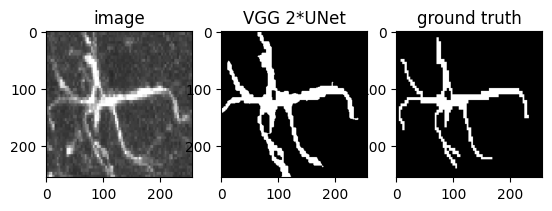

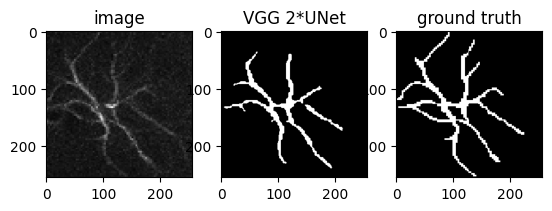

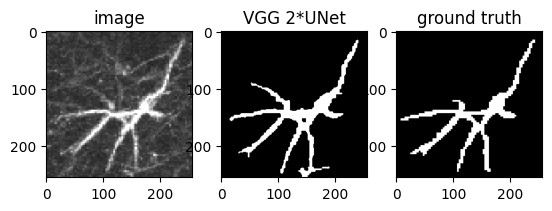

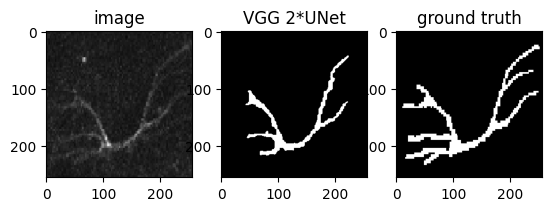

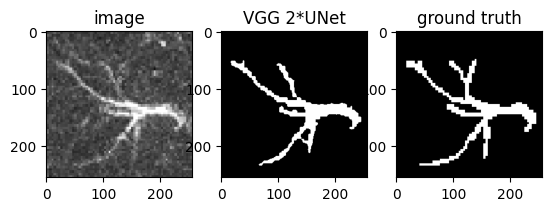

In [7]:
#show 5 predicted samples
num_imgs = 5
show_pred(test_path, test_label, tar_path, num_imgs)

- cauculate the `dice loss` and `mse` between the ground truth masks and predicted masks

In [8]:
#show dice loss of test set
diceT = dice(tar_path,test_label)
mse = mse_loss(tar_path,test_label)

0.png
dice loss: 0.80256438118005
1.png
dice loss: 0.7310763334397956
2.png
dice loss: 0.7739303482587064
3.png
dice loss: 0.7562991332392662
4.png
dice loss: 0.7622945408937883
5.png
dice loss: 0.81927303465765
6.png
dice loss: 0.7238732532965951
7.png
dice loss: 0.7564547206165704
8.png
dice loss: 0.7266716880073646
9.png
dice loss: 0.855527528920588
10.png
dice loss: 0.7445145776976255
11.png
dice loss: 0.8091922946941534
12.png
dice loss: 0.6640599543825351
13.png
dice loss: 0.7789244186046511
14.png
dice loss: 0.7453096890259573
15.png
dice loss: 0.7991452991452992
16.png
dice loss: 0.7142857142857143
17.png
dice loss: 0.8093393361951629
18.png
dice loss: 0.8026593664450528
19.png
dice loss: 0.8055555555555556
20.png
dice loss: 0.6400648166902978
21.png
dice loss: 0.8467932585983375
22.png
dice loss: 0.7490718497488534
23.png
dice loss: 0.7501610824742269
24.png
dice loss: 0.8155026241421074
25.png
dice loss: 0.6254221261650682
26.png
dice loss: 0.853774870536931
27.png
dice loss:

- using pretrained `Model_GESU_oct16.hdf5` model to predict your images

In [ ]:
#predict all images
images_path = 'your image patch path'
mask_path = 'save predicted mask path'
temp = 'temp path'
pred_dir = os.listdir(images_path)
for dir in pred_dir:
    patches_path = os.path.join(images_path, dir)
    model = myGESUnet(img_rows = 256, img_cols= 256, train_path=train_path, train_label=train_label, test_path=patches_path, test_label=test_label)
    imgs_train, imgs_mask_train, imgs_test = model.load_data()
    model = model.get_gesunet()
    model.load_weights(os.path.join(model_path, "Model_GESU_oct16.hdf5"))
    imgs_mask_test = model.predict(imgs_test[:,:,:,0], batch_size=1, verbose=1)
    np.save('imgs_mask_test.npy', imgs_mask_test)

    #save predicted mask
    name = glob.glob(patches_path+'/*.png')
    shutil.rmtree(temp)
    os.makedirs(temp)
    print("array to image")
    imgs = np.load('imgs_mask_test.npy')
    for i in range(imgs.shape[0]):
        img = array_to_img(imgs[i])
        img_name = name[i]
        img_name = img_name[img_name.rindex("/") + 1:]
        img.save(os.path.join(temp, img_name))

    #convert predicted grayscale image to binary mask
    img_path = temp
    biimg_path = './bi'
    if os.path.exists(biimg_path):
        shutil.rmtree(biimg_path)
    os.makedirs(biimg_path)
    to_binary(img_path, biimg_path)
    #post processing
    img_path = biimg_path
    tar_path = os.path.join(mask_path, dir)
    post_process(img_path, tar_path)
    
